In [2]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import linear_model

In [24]:
cf_results = pd.read_csv("CF-testresults.csv")
cb_results = pd.read_csv("CB-testresults.csv")
svd_results = pd.read_csv("svd-testresults.csv")
hybrid_results = pd.read_csv("svd-testresults.csv")

In [20]:
hybrid_results = hybrid_results.drop('label',1)

In [28]:
hybrid_results["label_0.1"] = ""
hybrid_results["label_0.2"] = ""
hybrid_results["label_0.3"] = ""
hybrid_results["label_0.4"] = ""
hybrid_results["label_0.5"] = ""
hybrid_results["label_0.6"] = ""
hybrid_results["label_0.7"] = ""
hybrid_results["label_0.8"] = ""
hybrid_results["label_0.9"] = ""

In [22]:
alpha=[0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]

In [25]:
svd_predictions = svd_results['label']
cb_predictions = cb_results['label']
cf_predictions = cf_results['label']

In [29]:
for index, i in enumerate(alpha):
    n_validation_users = len(hybrid_results.index)
    for j in range(n_validation_users):
        qid_val = hybrid_results.iloc[j]['qid']
        uid_val = hybrid_results.iloc[j]['uid']
        label = 'label_0.' + str(index+1)
        hybrid_results.iloc[j, hybrid_results.columns.get_loc(label)] = (i * cf_predictions[j]) + ((1-i)*cb_predictions[j])

In [30]:
from sklearn.metrics import mean_squared_error
from math import sqrt
def rmse(prediction, ground_truth):
    return sqrt(mean_squared_error(prediction, ground_truth))

In [31]:
mae = []
mae.append(rmse(hybrid_results['label_0.1'], hybrid_results.answered))
mae.append(rmse(hybrid_results['label_0.2'], hybrid_results.answered))
mae.append(rmse(hybrid_results['label_0.3'], hybrid_results.answered))
mae.append(rmse(hybrid_results['label_0.4'], hybrid_results.answered))
mae.append(rmse(hybrid_results['label_0.5'], hybrid_results.answered))
mae.append(rmse(hybrid_results['label_0.6'], hybrid_results.answered))
mae.append(rmse(hybrid_results['label_0.7'], hybrid_results.answered))
mae.append(rmse(hybrid_results['label_0.8'], hybrid_results.answered))
mae.append(rmse(hybrid_results['label_0.9'], hybrid_results.answered))

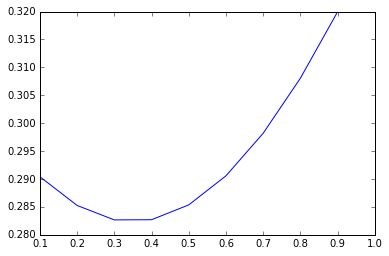

In [34]:
plt.plot(alpha, mae)
plt.show()

In [35]:
hybrid_results.to_csv("hybrid_results_cf_lr.csv")

In [12]:
cf_results_val = pd.read_csv("./Results/user-based_results.csv")
cb_results_val = pd.read_csv("./attempt1.csv")
svd_results_val = pd.read_csv("./Results/svd-based_results.csv")

In [13]:
VAL   = './bytecup2016data/validate_nolabel.txt'
valdata = pd.read_csv(VAL)
valdata['label'] = ""

In [14]:
cf_predictions = cf_results_val['label']
cb_predictions = cb_results_val['label']
svd_predictions = svd_results_val['label']

In [15]:
n_validation_users = len(valdata.index)
for j in range(n_validation_users):
    valdata.iloc[j, valdata.columns.get_loc('label')] = (0.4 * svd_predictions[j]) + (0.6*cb_predictions[j])

In [16]:
valdata.to_csv('hybrid_svd_logisticregression.csv')